# Modelling

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [7]:
hotels = pd.read_csv('hotels.csv')
searches = pd.read_csv('searches.csv')
td = pd.read_csv('train.csv')

In [8]:
searches['prop_ids'] = searches['prop_ids'].apply(lambda x: [int(id) for id in x.strip('[]').split(',')])

# Explode the prop_ids column to create multiple rows for each property ID
searches_data_exploded = searches.explode('prop_ids')

# Convert the prop_ids column to integer type
searches_data_exploded['prop_ids'] = searches_data_exploded['prop_ids'].astype(int)

# Merge the datasets based on the common column 'prop_id'
merged_data = pd.merge(searches_data_exploded, hotels, left_on='prop_ids', right_on='prop_id')

# sort by search_id
merged_data.sort_values(by=['srch_id'], inplace=True)

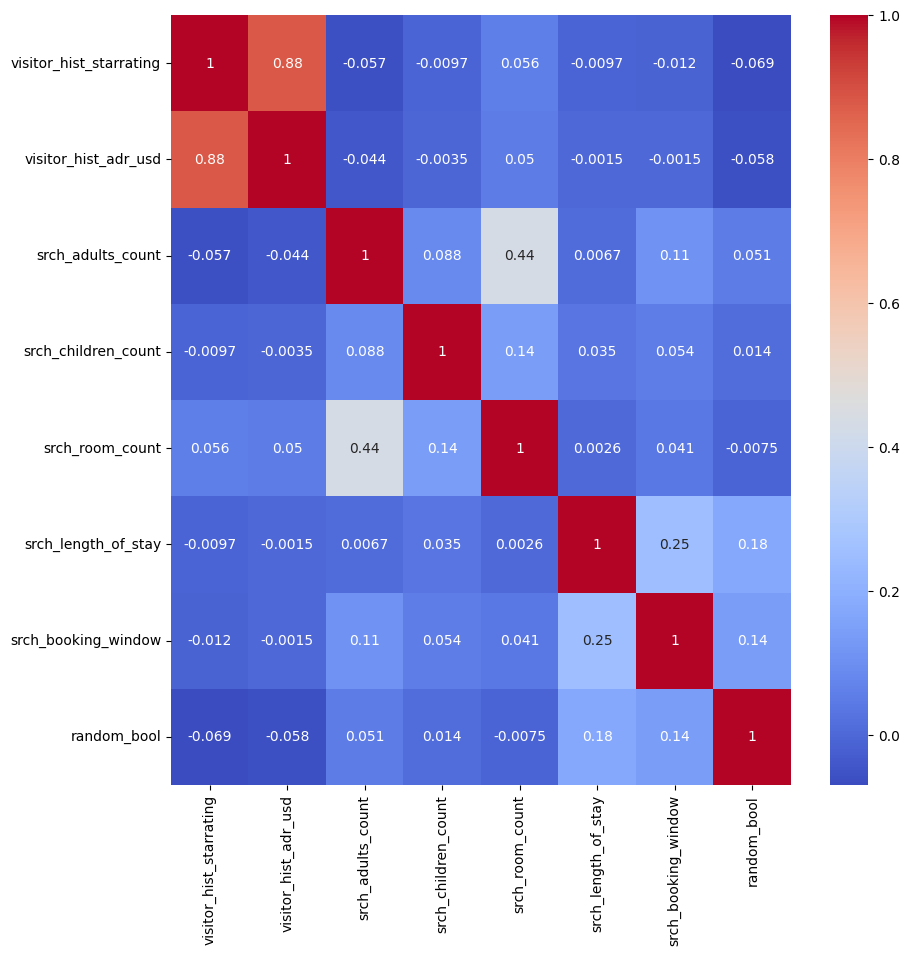

In [9]:
columns_to_include = ['visitor_hist_starrating', 'visitor_hist_adr_usd', 'srch_adults_count', 'srch_children_count', 'srch_room_count', 'srch_length_of_stay', 'srch_booking_window', 'random_bool',]
user_data = searches[columns_to_include]

# Normalize the data
normalized_data = (user_data - user_data.mean()) / user_data.std()

correlation_matrix = normalized_data.corr()

# plot correlation matrix
plt.figure(figsize=(10,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

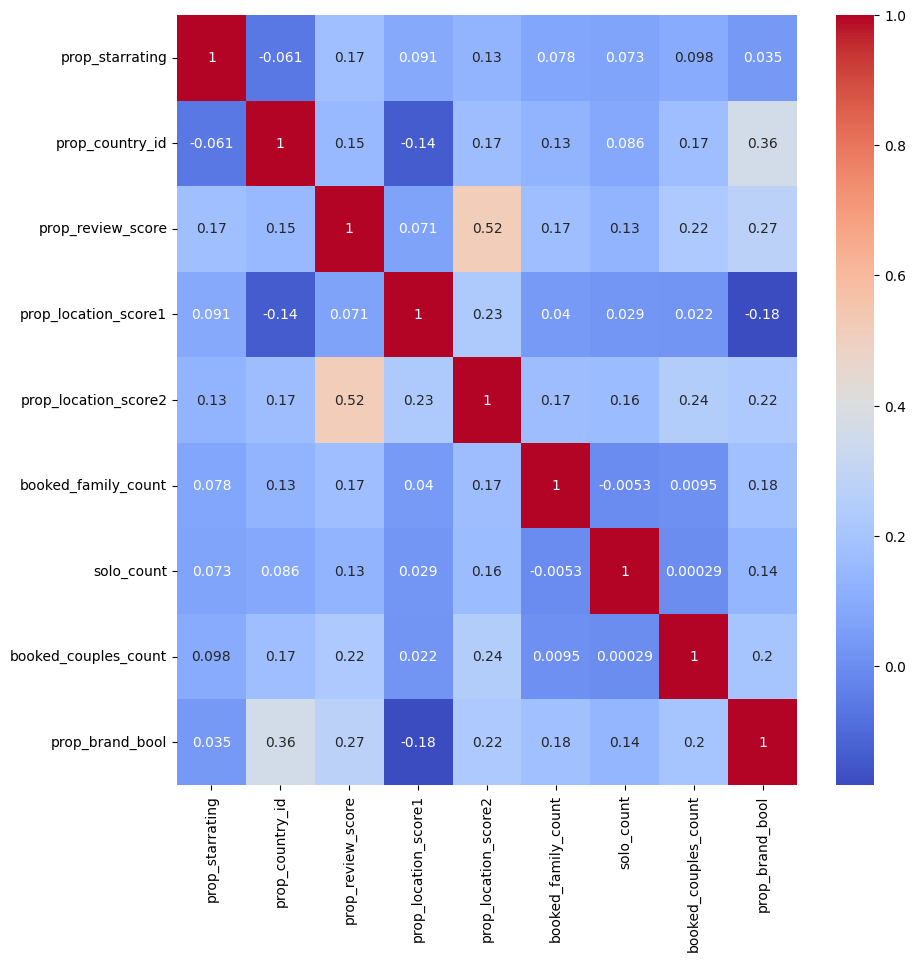

In [11]:
# create a correlation matrix for hotels
columns_to_include = ['prop_starrating', 'prop_country_id', 'prop_review_score', 'prop_location_score1', 'prop_location_score2', 'booked_family_count', 'solo_count', 'booked_couples_count', 'prop_brand_bool']
hotel_data = hotels[columns_to_include]

# Normalize the data
normalized_data = (hotel_data - hotel_data.mean()) / hotel_data.std()

# Calculate Pearson correlation matrix
correlation_matrix = normalized_data.corr()

# Print the correlation matrix
plt.figure(figsize=(10,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [12]:
merged_data

,srch_id,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,srch_adults_count,srch_children_count,srch_room_count,srch_length_of_stay,srch_booking_window,...,prop_id,prop_starrating,prop_country_id,prop_review_score,prop_location_score1,prop_location_score2,booked_family_count,solo_count,booked_couples_count,prop_brand_bool
0,1,12,187,0.0,-1.0,4,0,1,1,0,...,893,3,219,3.5,2.83,0.056857,0.100000,0.400000,0.400000,1
14076,1,12,187,0.0,-1.0,4,0,1,1,0,...,111106,3,219,2.5,0.69,0.008650,0.000000,0.500000,0.500000,1
13444,1,12,187,0.0,-1.0,4,0,1,1,0,...,111000,3,219,4.5,2.20,0.024400,0.700000,0.100000,0.100000,1
12851,1,12,187,0.0,-1.0,4,0,1,1,0,...,107872,2,219,3.5,2.71,0.058120,0.400000,0.400000,0.200000,1
12321,1,12,187,0.0,-1.0,4,0,1,1,0,...,97247,2,219,3.5,2.83,0.023433,0.166667,0.333333,0.500000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3431492,332785,5,219,0.0,-1.0,3,0,1,1,21,...,77700,3,219,4.0,1.61,0.047100,0.000000,0.000000,0.500000,1
3431530,332785,5,219,0.0,-1.0,3,0,1,1,21,...,88083,3,219,4.0,1.95,0.149762,0.000000,0.166667,0.666667,1
3431573,332785,5,219,0.0,-1.0,3,0,1,1,21,...,94508,3,219,3.5,1.10,0.025385,0.000000,0.000000,0.000000,1
4804613,332785,5,219,0.0,-1.0,3,0,1,1,21,...,134949,3,219,2.5,1.10,0.809600,0.000000,0.000000,1.000000,1


In [13]:
# drop prices positions booked_prop_ids promoted_prop_ids clicked_prop_ids average_booked_price
merged_data.drop(['prices', 'positions', 'promoted_prop_ids', 'clicked_prop_ids', 'average_booked_price'], axis=1, inplace=True)
# add columns price, position, booking_bool, click_bool from td
merged_data = pd.merge(merged_data, td[['srch_id', 'prop_id', 'price_usd', 'position', 'click_bool']], on=['srch_id', 'prop_id'], how='left')

In [16]:
merged_data.columns

Index(['srch_id', 'site_id', 'visitor_location_country_id',
       'visitor_hist_starrating', 'visitor_hist_adr_usd', 'srch_adults_count',
       'srch_children_count', 'srch_room_count', 'srch_length_of_stay',
       'srch_booking_window', 'random_bool', 'prop_ids', 'booked_prop_ids',
       'booked_position', 'prop_id', 'prop_starrating', 'prop_country_id',
       'prop_review_score', 'prop_location_score1', 'prop_location_score2',
       'booked_family_count', 'solo_count', 'booked_couples_count',
       'prop_brand_bool', 'price_usd', 'position', 'click_bool'],
      dtype='object')

In [ ]:
# Normalize the data
normalized_data = (merged_data - merged_data.mean()) / merged_data.std()

# Calculate Pearson correlation matrix
correlation_matrix = normalized_data.corr()

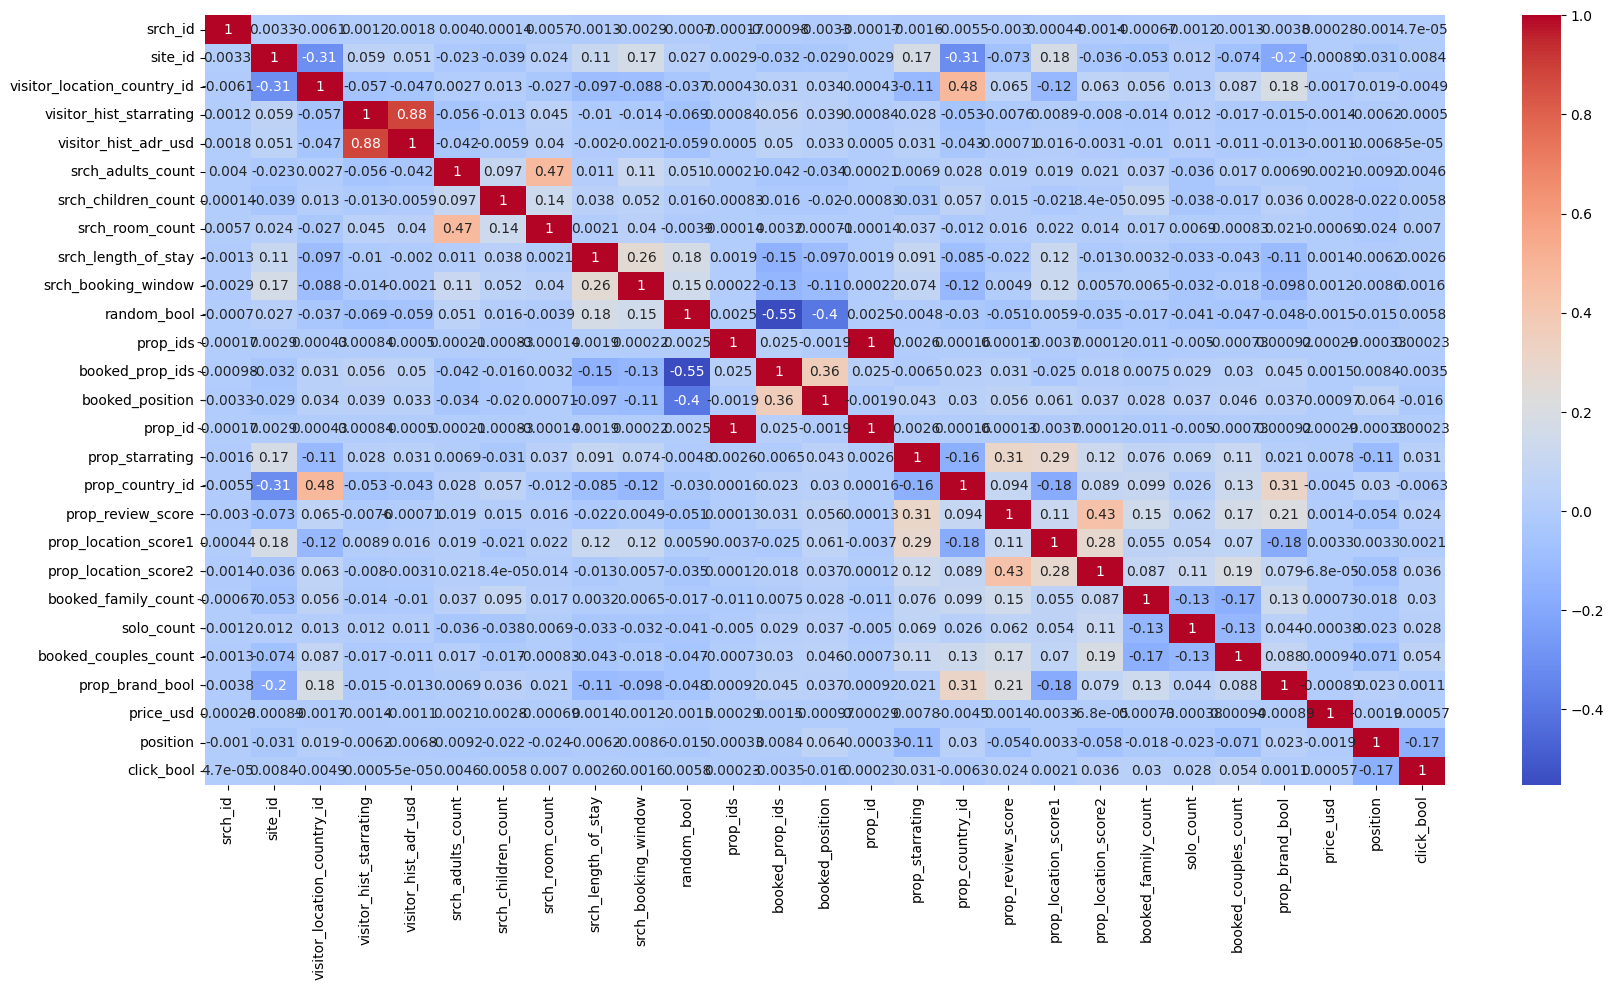

In [15]:
# Print the correlation matrix
plt.figure(figsize=(20,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [ ]:
# X = merged_data.drop(columns=["booked_prop_ids"])
# y = merged_data["booked_prop_ids"]

# # Split the dataset into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Scale the features
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# # Train the KNN classifier
# k = 5  # Number of neighbors to consider
# knn = KNeighborsClassifier(n_neighbors=k)
# knn.fit(X_train_scaled, y_train)

# y_pred = knn.predict(X_test)

# # Evaluate the accuracy of the classifier
# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy:", accuracy)

/usr/local/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


Accuracy: 0.2927435538031805


In [ ]:
# # Function to filter recommended hotels based on prop_country_id
# def filter_by_country(recommended_hotels, search_country_id):
#     return [hotel_id for hotel_id in recommended_hotels if merged_data.loc[hotel_id, "prop_country_id"] == search_country_id]

# # Function to predict the hotels most likely to be booked for a given search data
# def predict_booked_hotels(search_data, search_country_id, n_neighbors):
#     # Preprocess the search data
#     search_data_scaled = scaler.transform([search_data])

#     # Find the nearest neighbors based on search data
#     distances, indices = knn.kneighbors(search_data_scaled, n_neighbors=n_neighbors)

#     # Get the booking history of similar users
#     similar_users_booking = y_train.iloc[indices[0]]

#     # Combine and count the frequency of booked hotels
#     recommended_hotels_counts = similar_users_booking.value_counts()

#     # Filter recommended hotels based on prop_country_id
#     filtered_hotels = filter_by_country(recommended_hotels_counts.index, search_country_id)

#     return filtered_hotels

# # Example usage
# search_data = [12, 187, 0.0, -1.0, 4, 0, 1, 1, 0, 1, 100.89, 13.0]  # Example search data
# search_country_id = 187  # Example search country ID
# n_neighbors = 10  # Number of similar users to consider

# recommended_hotels = predict_booked_hotels(search_data, search_country_id, n_neighbors)
# print("Recommended hotels:", recommended_hotels)

NameError: name 'scaler' is not defined